# Nucleic acid labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import chilife as xl
plt.style.use('chiLife')

In this tutorial we will create two new nucleic acid spin labels and use them on a variety of nucleic acids. Unlike most protein labels, nucleic acid labels are often attached at a variety of different locations on a single residue including different backbone positions and sometimes on the side chain as illustrated below. 

![Alternate alignment positions](alt_aln_pos.png)


## Automated label backbone detection

For some labels, primarily those that protrude from the sugar-phosphate backbone, chiLife will be able to detect which part of the label is backbone and which is side chain, automatically detecting the alignment atoms and mobile side chain dihedrals. 

In [2]:
xl.create_library('C2P', 'C2P.pdb', spin_atoms=["N35", "O36"])
xl.rotlib_info('C2P')


********************************************************************************
*  Rotamer Library Name:                                                  C2P  *
********************************************************************************
Rotamer Library Name: C2P
File: E:\07)Programming\Python\chiLife\examples\10 - Nucleic acid 
    labels\C2P_rotlib.npz
Description: None
Comment: None

Length of library: 1
Dihedral definitions: 
    ["C3'" "C2'" 'N05' 'C02']
    ["C2'" 'N05' 'C02' 'O07']
    ['N05' 'C02' 'C03' 'C04']
Spin atoms: ['N35' 'O36']
Number of atoms: P: 1, O: 7, C: 14, N: 2, H: 21
Number of heavy atoms: 24
Reference: None
chiLife rotlib format: 1.4
********************************************************************************


Labels that are created like this can be used on all types of nucleic acid residues.

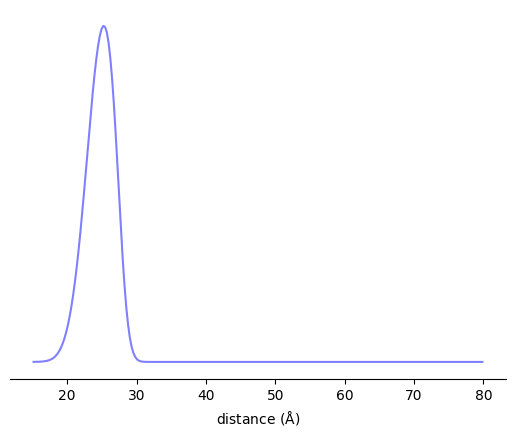

In [3]:
DNA_RNA_Hybrid = xl.fetch('1fix')

# Label an RNA cytosine 
SL1 = xl.SpinLabel('C2P', 7, DNA_RNA_Hybrid, chain='A', sample=5000)

# Label a DNA guanine
SL2 = xl.SpinLabel('C2P', 12, DNA_RNA_Hybrid, chain='B', sample=5000)

r = np.linspace(15, 80, 256)
P = xl.distance_distribution(SL1, SL2, r)

fig, ax = plt.subplots()
ax.plot(r, P)
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.set_yticks([])
for spine in ax.spines:
    if spine=='bottom':
        continue
    ax.spines[spine].set_visible(False)
plt.show()

In [4]:
xl.save(SL1, SL2, DNA_RNA_Hybrid)

## Manual label backbone definition

When creating labels that attach to a side chain, or a label that has multiple branches off the backbone, you must specify which atoms to use for the alignment of the label to the site. For example the TUM label attaches to the side chain if uracil residues.  

![TUM](tum.png)


This can be done by passing the ``aln_atoms`` keyword argument. For TUM we will use the three atoms of the uracil ring that preceding the spin label side chain. In the picture above, these atoms are highlighted as spheres. Note that this means the atoms preceding the side chain effectively become backbone atoms. 

> NOTE: The atom naming of the label must exactly match that of the PDB you wish to label. For this reason you should always use standard PDB naming conventions for bath backbone and side chain atoms for nucleic acids (and amino acids for that matter.) 


In [5]:
xl.create_library('TUM', 'TUM.pdb', aln_atoms=['N3', 'C4', 'C5'], spin_atoms=["N04", "O02"])

  dt=self.trajectory.ts.dt * step,



In [6]:
xl.rotlib_info('TUM')


********************************************************************************
*  Rotamer Library Name:                                                  TUM  *
********************************************************************************
Rotamer Library Name: TUM
File: E:\07)Programming\Python\chiLife\examples\10 - Nucleic acid 
    labels\TUM_rotlib.npz
Description: None
Comment: None

Length of library: 192
Dihedral definitions: 
    ['N3' 'C4' 'S01' 'S03']
    ['C4' 'S01' 'S03' 'C05']
    ['S01' 'S03' 'C05' 'C06']
    ['S03' 'C05' 'C06' 'C07']
Spin atoms: ['N04' 'O02']
Number of atoms: N: 3, C: 13, S: 2, O: 2, H: 18
Number of heavy atoms: 20
Reference: None
chiLife rotlib format: 1.4
********************************************************************************


>NOTE: Because we used standard atom naming conventions, and all pyrimidine use similar atom names, we can actually use this uricil label to label any pyrimidine

In [7]:
# Label an RNA uracil 
SL1 = xl.SpinLabel('TUM', 2, DNA_RNA_Hybrid, chain='A')

# Label a RNA cytosine
SL2 = xl.SpinLabel('TUM', 9, DNA_RNA_Hybrid, chain='A')


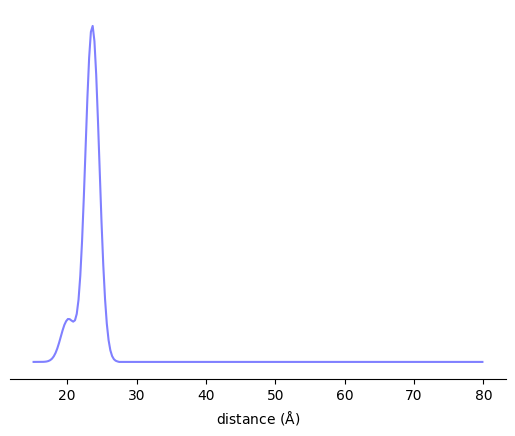

In [8]:
P = xl.distance_distribution(SL1, SL2, r)

fig, ax = plt.subplots()
ax.plot(r, P)
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.set_yticks([])
for spine in ax.spines:
    if spine=='bottom':
        continue
    ax.spines[spine].set_visible(False)
plt.show()

In [9]:
xl.save(SL1, SL2, DNA_RNA_Hybrid)

![TUML](TUMLabeled.png)
